---

## Proyecto Final - Creación de un modelo de ML para la predicción de fuga de clientes.

## Contextualización general del proyecto.

A manera de contextualización tenemos los siguiente:

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

Adicional a lo anterior, también nos hacen conocimiento de los servicios principales y secundarios que el operador ofrece a sus clientes o potenciales clientes, los cuales son los siguientes:

_Servicios principales._

1. _Comunicación por teléfono fijo._ El teléfono se puede conectar a varias líneas de manera simultánea.
2. _Internet._ La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

_Servicios secundarios_

1. Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
2. Una línea de soporte técnico (*SoporteTécnico*).
3. Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
4. Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)


**Tal y como hemos mencionado anteriormente, explorarémos algunos modelos de ML que puedan ayudarnos a cumplir con la tarea encomendada a partir de las métricas que a continuación comentaremos**:

- Las métricas *ROC - AUC* y *exactitud* (accuracy), serán las métricas importantes para poder evaluar y comparar nuestros modelos de ML, de antemano se conoce que por estas métricas nuestros modelos estarán acotados por modelos de clasificación, por lo tanto, veremos cómo la versatilidad que los modelos propuestos puedan ayudarnos a lograr nuestro objetivo principal, el de predecir si un cliente cancela o no el servicio.

## Plan de Trabajo o Flujo de trabajo 

El flujo de trabajo propuesto es el siguiente:

1. Vista previa de los datos, preprocesamiento de datos.

2. EDA, análisis exploratorio de datos, verificar la información de nuestros datasets, buscar correlaciones entre columnas, verificar tipos de datos correctos en cada columna y enriquecimiento de datos (si se requiere).

3. Propuesta y creación de modelos de ML.
- Se revisarán los modelos de clasificación que puedan brindarnos mejores insights en cuanto a métricas objetivo se refiere.

4. Entrenamiento y evaluación de modelos.
- Es posible que en este paso revisaremos qué hiperparámetros podemos cambar y/o optimizar para mejorar, si es el caso, de las métricas objetivo.

5. Comparación respectiva de los modelos.
- Haremos una comparación entre los modelos creados y propuestos respecto a las métricas _ROC - AUC_ y _accuracy_ y elegir el mejor modelo entre los mismos. Crearemos un tabla comparativa a manera de resumen.


Conociendo y sabiendo lo anterior, procedemos a empezar el proyecto.

## 1. Vista previa de datos. Preprocesamiento de datos.

### Carga de librerías

In [1]:
#Librerías básicas para la visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos de ML de clasificación y métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
#Normalización de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Potenciación de gradiente
from catboost import CatBoostClassifier, Pool

### 1.1 Carga de datasets para visualización

Contamos con un total de _4 datasets_ que se se tienen, esta información fue proporcionada por el cliente.

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

In [2]:
#Carga de datasets 
contrato = pd.read_csv(r'D:\Escritorio\TRIPLETEN\Sprint 16 - Visión Artificial\final_provider\contract.csv')
personal = pd.read_csv(r'D:\Escritorio\TRIPLETEN\Sprint 16 - Visión Artificial\final_provider\personal.csv')
internet = pd.read_csv(r'D:\Escritorio\TRIPLETEN\Sprint 16 - Visión Artificial\final_provider\internet.csv')
telefono = pd.read_csv(r'D:\Escritorio\TRIPLETEN\Sprint 16 - Visión Artificial\final_provider\phone.csv')

In [3]:
#Visualicemos la información general de cada dataset
for i in ([contrato, personal, internet, telefono]):
    print(i.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object

Primeras impresiones de los datasets:

- Tanto el dataset ``contrato`` como ``personal``, tienen el mismo número de filas.
- Por otro lado, los datasets ``internet`` y ``telefono`` no son homogéneos en el sentido de las filas, lo mismo para las columnas.

De momento, de acuerdo con la información general, no contamos con _valores nulos_ en ninguno de nuestros datasets. Podemos apreciar también que existe un común denominador de todos los datasets el cual es tener la columna ``customerID`` el cual consiste en ser un identificador para cada cliente de la compañía. Esta columna puede ser un punto de partida al momento de querer fusionar nuestros datasets (_merge_). 

Sin embargo, antes de proceder a cualquier tipo de cambio o movimiento pertinente, me gustaría poder visualizar los datasets y verificar el tipo de de datos de cada columna en cada dataset, para que tengamos la distintión entre columnas _categóricas_ y columnas _numéricas_.

### 1.2 Visualización tabular de los datos

In [4]:
# Veamos el primer dataset, comentando hallazgos, entre otros
contrato.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


Para el caso del dataframe llamado ``contrato``, hemos hallado un par de errores en cuanto al tipo de dato:
1. La columna ``BeginDate`` no es del tipo correcto, este debe ser del tipo ``DateTime``.

2. La columna ``TotalCharges``, tienel el tipo de dato ``object``, cuando este tiene que ser ``int``.

In [5]:
#Segundo dataset
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Lo interesante de este dataset es que las columnas son totalmente categóricas (a excepción del ID), estas podrían cambiar al tipo de dato bolleano o quizá pensar más adelante en realizar una codificación (One - Hot Encoding).

In [6]:
#Tercer dataset
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Curiosamente puedo opinar lo mismo al respecto de este dataset, columnas totalmente categóricas que podrían ser codificadas.

In [7]:
#Ultimo dataset
telefono.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Este dataset podría representar si el cliente cuenta con otras líneas de servicio, tipo de dato bien.
En general no contamos con valores ausentes, pero claro, hablamos desde el punto de vista de que los datasets son individuales y aún no hemos hecho esta fusión de datos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada.

</div>

### Unión de datasets y enriquecimiento de datos

Para este paso vamos a fusionar (unir) los datasets para que tengamos solo un dataframe y podamos tener mejores insights para que podamos apreciar correlaciones, estadísticas descriptivas, etc...

In [8]:
#Usemos la función merge para poder unir nuestros datasets
df_merged = contrato.merge(personal, on='customerID', how='left')
df_merged = df_merged.merge(internet, on='customerID', how='left')
df_merged = df_merged.merge(telefono, on='customerID', how='left')

In [9]:
#Visualicemos estos datos
df_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


Uno de los primeros movimientos que voy a realizar en nuestro dataframe fusionado es la transformación de nuestras columnas categóricas no implicitas a columnas numéricas, es decir, esta conversión se realiza principalmente porque nuestros modelos de ML no procesan valores categóricos, a menos que sean códificados. 

Este paso principalmente se enfoca en el hecho de convertir esas columnas que columnas que tienen valores como ``Yes`` y ``No`` a valores binarios. 

In [11]:
#Vamos a declarar la lista de las columnas que son categóricas
columns_change = ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
#Vamos a crear un bucle para poder transformar estos valores
for col in columns_change:
    df_merged[col] = df_merged[col].replace({'No': 0, 'Yes': 1})
    #Aquí vamos a imputar con 0 aquellos servicios secundarios nulos
    df_merged[col] = df_merged[col].fillna(0)

C:\Users\Ariel\AppData\Local\Temp\ipykernel_9864\1034799909.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged[col] = df_merged[col].replace({'No': 0, 'Yes': 1})


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Gran idea reasignando los valores para las variables categóricas. Esto facilitará su manipulación.

</div>

In [12]:
df_merged.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,Female,0,1,0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.5,Male,0,0,0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,Male,0,0,0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,Male,0,0,0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Female,0,0,0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Vamos a cambiar los tipos de datos de algunas columnas que son incorrectos
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'])
#df_merged['TotalCharges'] = df_merged['TotalCharges'].astype(float)

In [14]:
#Existe un pequeño error con algunas filas de la columna TotalCharges, visualicemos.
df_merged[df_merged['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,1,Bank transfer (automatic),52.55,,Female,0,1,1,DSL,1.0,0.0,1.0,1.0,1.0,0.0,0.0
753,3115-CZMZD,2020-02-01,No,Two year,0,Mailed check,20.25,,Male,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,0,Mailed check,80.85,,Female,0,1,1,DSL,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,0,Mailed check,25.75,,Male,0,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1340,1371-DWPAZ,2020-02-01,No,Two year,0,Credit card (automatic),56.05,,Female,0,1,1,DSL,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,0,Mailed check,19.85,,Male,0,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,0,Mailed check,25.35,,Male,0,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4380,2520-SGTTA,2020-02-01,No,Two year,0,Mailed check,20.00,,Female,0,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5218,2923-ARZLG,2020-02-01,No,One year,1,Mailed check,19.70,,Male,0,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,0,Mailed check,73.35,,Female,0,1,1,DSL,0.0,1.0,1.0,1.0,1.0,0.0,1.0


La representación de valores nulos en la columna ``TotalCharges`` no es significativa, supone solamente 11 filas las cuales fácilmente podemos despreciar eliminandolas. 

Es interesante mencionar también que hallamos valores nulos en columnas asociadas con los servicios secundarios, esto nos hace pensar que estos clientes, en general, no requieren de todos los servicios. Lo mejor ahora es despreciar estos valores.

In [15]:
#Vamos a eliminar estas columnas que no tienen información y realizar la nueva conversión de tipo de dato
df_merged = df_merged[df_merged['TotalCharges'] != ' ']
df_merged['TotalCharges'] = df_merged['TotalCharges'].astype(float)

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   int64         
 11  Dependents        7032 non-null   int64         
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    7032 non-null   float64       
 14  OnlineBackup      7032 non-nu

Ya no contamos con valores nulos en la mayoría de nuestras columnas, sin embargo, aún tenemos la columna ``InternetService`` que podemos revisar adelante. Esta columna de momento es considerada con categórica.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ariel fue una buena decisión eliminar las filas con los valores faltanes, al ser una proporción tan pequeña comparada con el total de los datos, es la mejor estrategía.

</div>

## 2. EDA 

Vamos a realizar una inspección de las columnas categóricas que están contenidas en nuestro dataset. 
Estas columnas son ``PaymentMethod``, ``InternetService`` y ``Type``, veamos cuáles son los valores que están contenidos en estas columnas. ``Gender`` también entra en esta categoría, sim embargo, se asume que solo tenemos ``Male`` y  ``Female``.

In [17]:
#Declaremos las columnas de interés
cathegorical_cols = ['PaymentMethod', 'InternetService', 'Type']

#Bucle para ver sus datos
for col in cathegorical_cols:
    print(col)
    print(df_merged[col].unique())
    print()

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

InternetService
['DSL' 'Fiber optic' nan]

Type
['Month-to-month' 'One year' 'Two year']



Por el momento, solo voy a imputar los valores nulos de la columna ``InternetService`` con None, así podemos realizar una distinción de quienes cuentan con el servicio.

In [18]:
#Imputar valores nulos en la columna InternetService
df_merged['InternetService'] = df_merged['InternetService'].fillna('None')

#Veamos una vez más la información general de nuestro dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   int64         
 11  Dependents        7032 non-null   int64         
 12  InternetService   7032 non-null   object        
 13  OnlineSecurity    7032 non-null   float64       
 14  OnlineBackup      7032 non-nu

Ahora ya contamos con un dataframe ordenado en cuanto a valores nulos y tipos de datos. 
Ahora me gustaría poder observar cómo es la distribución de fechas, si tiene un orden o no.

In [19]:
print(df_merged['BeginDate'].is_monotonic_increasing)

False


Bien, ahora lo importante es tratar de tener en orden cronológico nuestra columna para que tenga coherencia temporal y podamos ver su comportamiento.

In [20]:
#Vamos a ordernar esta columna para que tenga coherencia temporal
df_merged = df_merged.sort_values('BeginDate')
df_merged['BeginDate'].unique()

<DatetimeArray>
['2013-10-01 00:00:00', '2013-11-01 00:00:00', '2013-12-01 00:00:00',
 '2014-01-01 00:00:00', '2014-02-01 00:00:00', '2014-03-01 00:00:00',
 '2014-04-01 00:00:00', '2014-05-01 00:00:00', '2014-06-01 00:00:00',
 '2014-07-01 00:00:00', '2014-08-01 00:00:00', '2014-09-01 00:00:00',
 '2014-10-01 00:00:00', '2014-11-01 00:00:00', '2014-12-01 00:00:00',
 '2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00',
 '2016-01-01 00:00:00', '2016-02-01 00:00:00', '2016-03-01 00:00:00',
 '2016-04-01 00:00:00', '2016-05-01 00:00:00', '2016-06-01 00:00:00',
 '2016-07-01 00:00:00', '2016-08-01 00:00:00', '2016-09-01 00:00:00',
 '2016-10-01 00:00:00', '2016-11-01 00:00:00', '2016-12-01 00:00:00',
 '2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '20

<Axes: title={'center': 'Clientes por año'}, xlabel='BeginDate'>

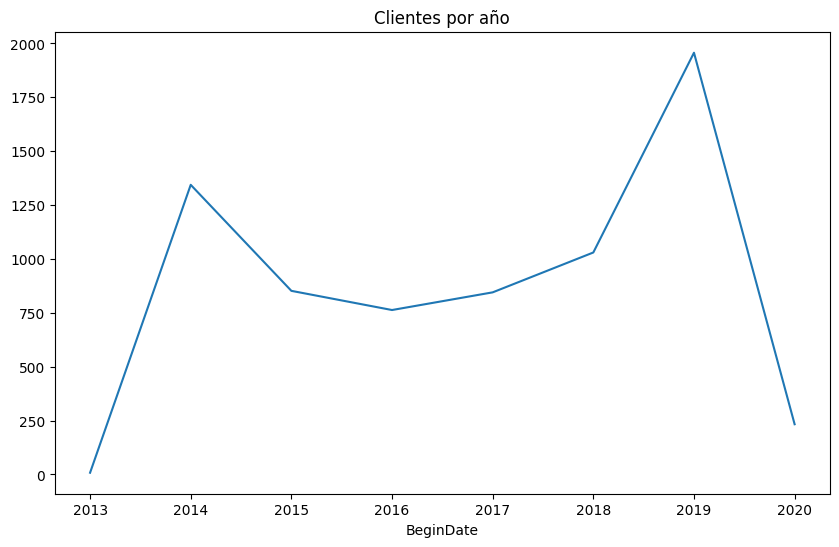

In [21]:
#Grafiquemos por año cómo es el comportamiento de esto
data_year = df_merged['BeginDate'].dt.year.value_counts().sort_index()
data_year.plot(figsize =  (10, 6), title = 'Clientes por año')

Uno de los principales insights que podemos notar es que tenemos dos picos respectivamente en los años 2014 y 2019, esto se explica en el sentido de que muchos cientes contrataron un plan, posiblemente los picos se deban también a contextos promocionales que se dieron en su momentos y los clientes aprovecharon.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Correcto Ariel, es clave evaluar el comportamiento de los usuarios. Tu hipótesis parecen razonables en el contexto del caso de estudio,

</div>

In [22]:
df_merged['BeginDate'].describe()

count                             7032
mean     2017-04-28 23:14:44.641638400
min                2013-10-01 00:00:00
25%                2015-06-01 00:00:00
50%                2017-09-01 00:00:00
75%                2019-04-01 00:00:00
max                2020-01-01 00:00:00
Name: BeginDate, dtype: object

In [23]:
#Ahora, dado que previamente tuve algunos errores al momento de entrenamiento con BeginDate
#Decido asignarla como índice de mi dataset
df_merged = df_merged.set_index('BeginDate')

La intención de revisar la información general de la columna ```BeginDate``, es para revisar qué fechas están contenidas.

Tal es el caso de que la primera fecha registrada es del 10 de enero de 2013, mientras que la última fecha registrada fue de día 1 de enero del 2020.

Ahora revisemos nuestra columna objetivo o target, ``EndDate``.

In [24]:
df_merged['EndDate'].value_counts()

EndDate
No                     5163
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: count, dtype: int64

Para propósitos del presente proyecto, es más conveniente delimitar nuestro objetivo o nuestra característica objetivo en un formato binario, de esta forma tendríamos que ``True`` será 1 y ``False`` será 0.

Para propuesta, voy a crear una nueva columna para que solamente tenga valores booleanos.


In [25]:
df_merged['Target'] = (df_merged['EndDate'] != 'No').astype(int)
#Visualicemos esta nueva columna
df_merged['Target'].value_counts()

Target
0    5163
1    1869
Name: count, dtype: int64

Ahora ya tenemos mejor acotada y diferenciada la información.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo, acá podemos notar un desequilibrio de las clases que requeriran estrategías para contrarestarlo

</div>

Considero que es conviente poder revisar las correlaciones entre las columnas.

<Axes: >

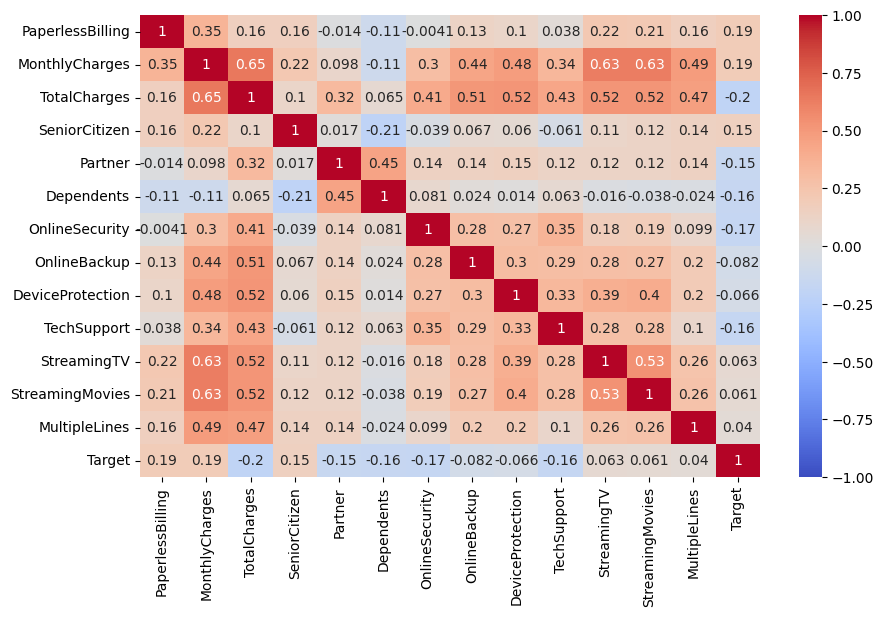

In [26]:
#Correlación entre la variblae objetivo y las demás
#Realizaré la distinción de columnas categoricas y numéricas
numeric_columns = df_merged.select_dtypes(include = ['number'])
corr_target = numeric_columns.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_target, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)

Primero hagamos un enfoque en las columnas/características que tienen una correlación en nuestra columna objetivo ``Target``, las columnas que tienen una correlación débil son:
- ``SeniorCitizen``
- ``MonthlyCharges``
- ``Paperless Billing``

Por otro lado, también vemos una correlación fuerte en columnas asociadas a los servicios secundarios ofrecidos por la compañia prestadora de los servicios principales en sentido de los cargos mensuales y cargos totales.

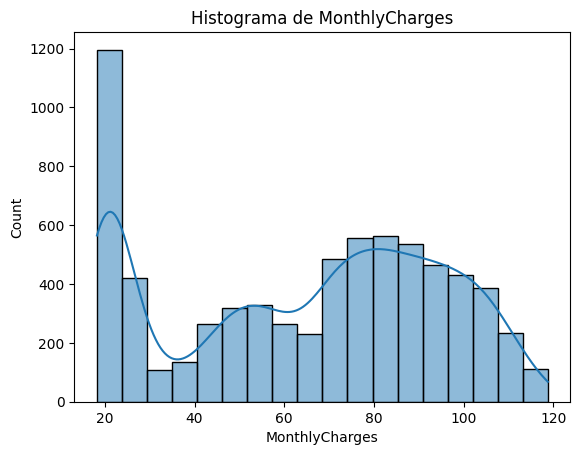

In [27]:
sns.histplot(df_merged['MonthlyCharges'], kde=True)
plt.title('Histograma de MonthlyCharges')
plt.show()

In [28]:
df_merged['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

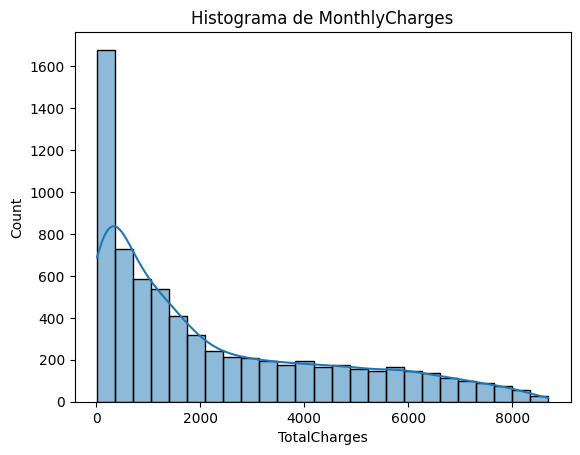

In [29]:
sns.histplot(df_merged['TotalCharges'], kde=True)
plt.title('Histograma de MonthlyCharges')
plt.show()

In [30]:
df_merged['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Las gráficas que has obtenido son correctas, pero es crucial acompañarlas con tu análisis y observaciones. Esto añade valor significativo a la información presentada y evita que solo sean datos sin contexto. Desarrollar esta capacidad de interpretación es esencial cuanto estamos trabajando con datos. 

</div>

## Preguntas Aclaratorias

1.- Durante mi análisis exploratorio de datos me he topado con dos columnas que cuentan con outliers, de acuerdo a la tarea de clasificación, ¿me conviene realizar una normalización o una estandarización de datos para que los modelos propuestos no tengan algún tipo de sesgo en la predicción por estos valores?

**La estandarización es un paso clave y muy avitual en el desarrollo de modelos predictivos esto le brinda robustez al modelo y suele mejorar el rendimiento, sobretodo cuando se trata de clasificación. Ahora buien, respecto a los outliers, su estudio es calve, no siempre es necesario eliminarlos, ya que el comportamiento "anormal" hace parte de la naturaleza de los mismos datos. Una practica común en este sentido es evaluar los modelos con y sin outliers. Acá te compato un [árticulo](https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/) que habla sobre esto**

2.- De acuerdo a la información presentada en los datasets, ¿me conviene realizar una reducción de variables/columnas?

**Esta es una estrategía muy buena, pero tu mismo debes establecer si es necesario. Puedes implementarla cuando ya tengas el modelo final para reducir su complejidad e identificar las características que más influyen en la clasificación con el fin de establecer segmentnaciones claves para futuros análisis. Te comparto una de las técnicas más populares: [Recursive Feature Elimination](https://machinelearningmastery.com/rfe-feature-selection-in-python/)**


## Próximos pasos

El flujo de trabajo propuesto es el siguiente:

1. Vista previa de los datos, preprocesamiento de datos.

2. EDA, análisis exploratorio de datos, verificar la información de nuestros datasets, buscar correlaciones entre columnas, verificar tipos de datos correctos en cada columna y enriquecimiento de datos (si se requiere).

3. Propuesta y creación de modelos de ML.
- Se revisarán los modelos de clasificación que puedan brindarnos mejores insights en cuanto a métricas objetivo se refiere. Los modelos principales van desde la Regresión Logística, Árbol de Decisión de Clasificación, Bosque Aleatorio de Decisión y otro que involucre potenciación de gradiente, posiblemente CatBoost. Usaremos la herramienta _GridSearchCV_ para poder aplicar diferentes rangos de hiperparámetros en nuestros modelos.

4. Entrenamiento y evaluación de modelos.
- Es posible que en este paso revisaremos qué hiperparámetros podemos cambiar y/o optimizar para mejorar, si es el caso, de las métricas objetivo. Metodología de prueba y error de acuerdo al cambio de los hiperparámetros.

5. Comparación respectiva de los modelos.
- Haremos una comparación entre los modelos creados y propuestos respecto a las métricas _ROC - AUC_ y _accuracy_ y elegir el mejor modelo entre los mismos. Crearemos un tabla comparativa a manera de resumen.


## 2.1 Seguimiento del caso

De momento, podemos mencionar que tenemos un par de columnas que cuentan con una escala u orden de magnitud diferente respecto a las demas columas y/o carcaterísticas presentes en el dataset.

Si bien es cierto que no son ordenes de magnitud o escalas muy grandes, al momento de revisar su distribución estas no tienen una distribución normal. Por lo anterior, y debido al impacto que se tiene, se decide _normalizar_ estas columnas. 

Para lo anterior, será conveniente utilizar _MinMaxScaler_ de la librería _scikit-learn_ para realizar este procedimiento. 

Una de las principales propuestas para este caso es también revisar la influencia de estas columnas en las métricas al momento de realizar nuestro entrenamiento. Sin embargo, antes de seguir, se tiene pensado revisar la columna objetivo _target_ para ver si están balanceadas las clases y no tener una medición de métricas no adecuada. 

## 2.1.1 Seguimiento EDA

In [31]:
#Revisemos de forma rápida la distribución de nuestra columna target
df_merged['Target'].value_counts()

Target
0    5163
1    1869
Name: count, dtype: int64

Dado que tenemos clases desbalanceadas, lo más conveniente es tomar acción en esto y tomar en cuenta lo siguiente para tomar una decisión en un balance de clases:

1. Vamos a aplicar un sobremuestreo en la clase minotitaria.

2. Podriamos seguir trabajando con nuestros modelos propuestos de clasficación ya que estos contienen un argumento denominado ``class_weight`` para poder ajustar las clases sin ningún tipo de intervención personal, como es el caso del sobremuestreo.


Vamos a realizar el movimiento deseado cuando tengamos acotado nuestro ``target`` y ``features``, además para evitar la fuga de datos (_data leakage_) vamos a realizar el movimiento después de realizar la división de nuestro set de entrenamiento y prueba.

## 2.2.1 Correlación de nuestra columna target con las variables/características categóricas.

Para este caso voy a realizar un visualización para que podamos apreciar cómo es la influencia o distribución entre nuestra columna objetivo y las columnas categóricas presentes en nuestro dataset.

Para esto, vamos a delimitar estas columnas y posteriormente aplicar el bucle en las mismas para la representación. 

Las columnas son: ``PaymentMethod``, ``gender``, ``InternetService``, ``Type``.

C:\Users\Ariel\AppData\Local\Temp\ipykernel_9864\875725698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_merged, x = col, y = 'Target', palette = 'viridis')


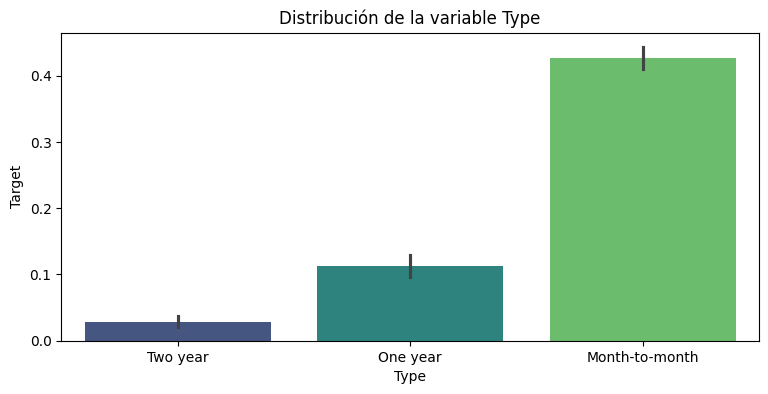

C:\Users\Ariel\AppData\Local\Temp\ipykernel_9864\875725698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_merged, x = col, y = 'Target', palette = 'viridis')


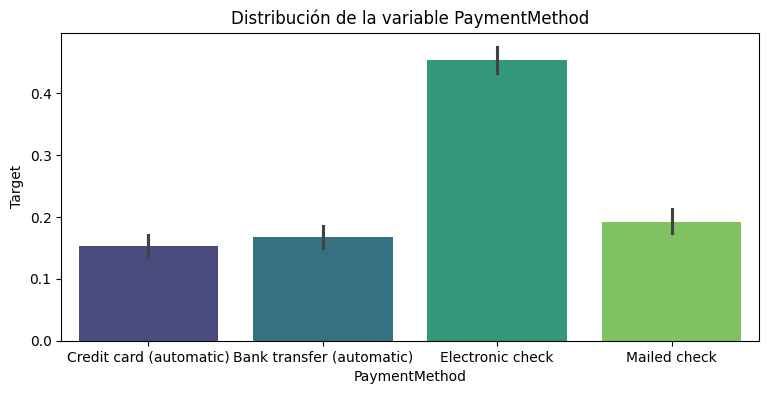

C:\Users\Ariel\AppData\Local\Temp\ipykernel_9864\875725698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_merged, x = col, y = 'Target', palette = 'viridis')


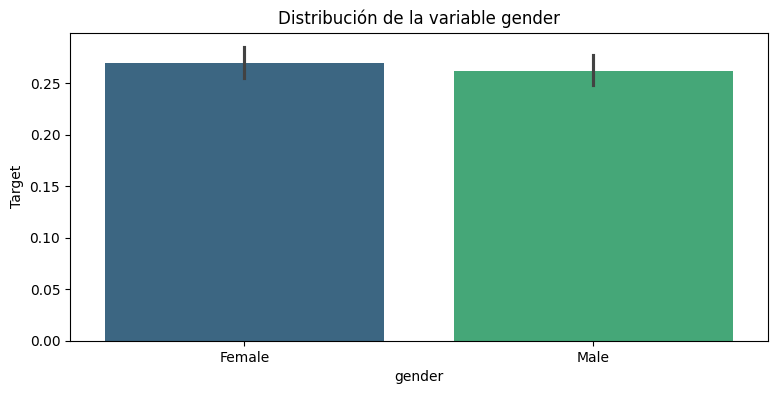

C:\Users\Ariel\AppData\Local\Temp\ipykernel_9864\875725698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_merged, x = col, y = 'Target', palette = 'viridis')


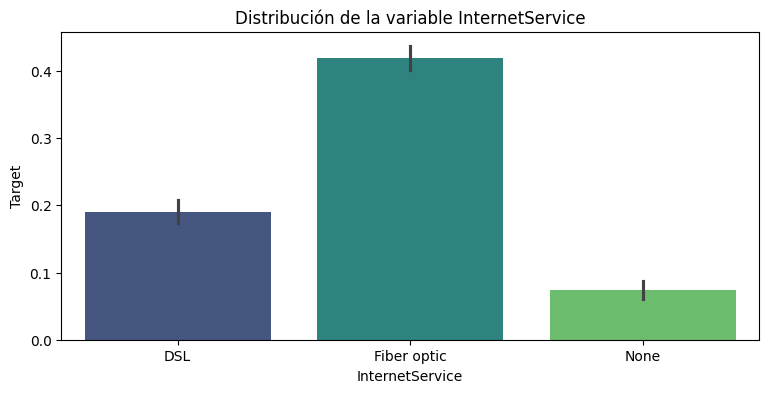

In [32]:
cat_columns = ['Type', 'PaymentMethod', 'gender', 'InternetService']

#Vamos a crear nuestro bucle
for col in cat_columns:
    plt.figure(figsize = (9, 4))
    sns.barplot(data = df_merged, x = col, y = 'Target', palette = 'viridis')
    plt.title(f'Distribución de la variable {col}')
    plt.show()

Teniendo en cuenta los gráficos podemos tener en cuenta lo siguiente. 

- La función `barplot` toma en cuenta el promedio o la media de una variable numérica en función de una columna categórica, teniendo contexto de esto tenemos que: 

1. Respecto al tipo de pago ``Type``, tenemos que el tipo de pago que tiene menor taza de cancelación son los que tienen tipo de pago a dos años.
2. En cuanto al método de pago (``PaymentMethod``) tenemos que quienes desisten del servicio son aquellos quienes pagan son cheque electrónico.
3. En la columna ``gender`` no hay mucho que rescatar o comentar al respecto, no hay un insight significativo.
4. La columna ``InternetService`` los que más cancelan el servicio son los que tienen el servicio de fibra óptica.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis de los gráficos demuestra una buena comprensión de cómo las variables categóricas influyen en la tasa de cancelación. 

</div>

## 2.2.2 Eliminación de columnas para tener un dataframe más concreto

Antes de empezar a comenzar con la delimitación de nuestro target y features para la partición (train_test_split) voy a eliminar algunas características que considero ya no son necesarias para el entrenamiento del modelo. 

Para esto, vamos a eliminar las características ``customerID`` y ``EndDate``, las razones de ambas características es porque la etiqueta de cada cliente no nos proporciona información relevante al modelo, estas son creadas de forma aleatoria para cada cliente pero no es representativo.

Por otro lado, la columna ``EndDate`` previamente ya ha sido transformada a una nueva característica (``Target``) en nuestro dataframe original que nos muestra la información de quiénes SÍ y quiénes NO han dado de baja o han prescindido del servicio telefónico. 

In [33]:
#Eliminación de columnas propuestas
df_merged = df_merged.drop(columns = ['customerID', 'EndDate'])
#df_merged = df_merged.drop(columns = ['customerID', 'EndDate'], inplace = True)

## 2.3 Conclusiones generales EDA 

Durante el preprocesamiento y el análisis exploratorio de datos, hemos hallado y propuesto lo siguiente:

- Hemos revisado los tipos de datos respectivos de cada variable/columna para que tenga coherencia al momento de realizar el entrenamiento de los datos.
- Hemos visto la correlación entren variables numéricas y categóricas respecto a nuestra columna ``Target``.
- Se hizo notorio el caso del desbalance de clases en nuestra columna objetivo, lo cual nuestra propuesta para poder manejar el desbalance es realizar un sobremuestreo en la clase minoritoria para tener clases balanceadas.
- Tenemos un par de columnas que tienen una escala mayor respecto a las demas columnas numéricas, por lo que vamos a normalizar estas columnas.
- Eliminamos un par de columnas que no tienen algún tipo de impacto significativo, una de estas columnas fue transformada para solo contener una clase binaria y son esos clientes que desisten o no del servicio.

Durante los siguientes pasos realizaremos lo siguiente:

- Codificación de variables no numéricas.
- Normalización de las columnas numéricas con diferente magnitud.
- Sobremuestreo en la clase minoritaria para nuestra columna/característica objetivo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ariel EDA refleja un enfoque metódico y bien estructurado para preparar los datos antes del entrenamiento del modelo. Has identificado y abordado problemas clave, como el desbalance de clases y la necesidad de normalización en columnas con escalas diferentes, lo cual es fundamental para garantizar la calidad de los resultados. Es destacable cómo has priorizado la eliminación de columnas irrelevantes y la transformación de otras para simplificar el análisis, lo que demuestra una comprensión clara de cómo optimizar el conjunto de datos. Además, tu propuesta de sobremuestreo para equilibrar las clases minoritarias es una estrategia sólida para mejorar el rendimiento del modelo, aunque para este tipo de análisis siempre es recomendable hacer un entrenamiento previo, con el fin de tener un punto de referencia pasra evaluar el efecto de la tecnica de balanceo.

</div>

## 3. Propuesta de modelos de Machine Learning para la tarea.

## 4. Entrenamiento y evaluación de Modelos

En esta sección vamos a _condicionar_ nuestro dataset para que podamos trabajar de forma planeada para que podamos entrenarlos apropiadamente con los modelos. 

Previamente se había mencionado sobre realizar lo siguiente:

- Codificación de variables no numéricas.
- Normalización de variables numéricas seleccionadas.
- Sobremuestreo de la clase minoritaria en nuestro ``target``. Aquí podemos aplicar un argumento que contienen algunos modelos de clasificación denominado ``class_weight`` para balancear sin realizar algún tipo de sobremuestreo. Ya veremos ese paso.

## 4.1 Asignación de las _features_ y _target_

In [34]:
#Target y features
features = df_merged.drop(columns = 'Target', axis = 1)
target = df_merged['Target']

In [35]:
#Codificación de variables categóricas en las características
features_ohe = pd.get_dummies(features, drop_first = True)

## 4.2 Partición del dataset en entrenamiento y prueba (_train, test_)

In [36]:
#Partición de los datos
features_train, features_test, target_train, target_test = train_test_split(features_ohe, target, test_size = 0.2, random_state = 12345)

Escalamiento de atributos numéricos (normalización)

In [37]:
'''
var_numeric = ['MonthlyCharges', 'TotalCharges']
normal = MinMaxScaler().fit(features_train[var_numeric])
features_train[var_numeric] = normal.transform(features_train[var_numeric])
features_test[var_numeric] = normal.transform(features_test[var_numeric])'
'''

"\nvar_numeric = ['MonthlyCharges', 'TotalCharges']\nnormal = MinMaxScaler().fit(features_train[var_numeric])\nfeatures_train[var_numeric] = normal.transform(features_train[var_numeric])\nfeatures_test[var_numeric] = normal.transform(features_test[var_numeric])'\n"

In [38]:
var_numeric = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler().fit(features_train[var_numeric])
features_train[var_numeric] = scaler.transform(features_train[var_numeric])
features_test[var_numeric] = scaler.transform(features_test[var_numeric])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo codificando las variables categóricas y escalando los valores numéricos. Esto permite tener un modelo más robusto y con mejor rendimiento, 

</div>

Balanceo de clases en la variable _target_ (sobremuestreo)

In [39]:
#Para este caso vamos a crear una función que nos permita realizar el sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    return features_upsampled, target_upsampled


In [40]:
#Aumentemos la cantidad de datos de la clase minoritaria
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)

In [41]:
#Veamos el tamaño de nuestros datos sobremuestreados
features_train_upsampled.shape, target_train_upsampled.shape

((7129, 21), (7129,))

#Vamos a volver a dividir nuestros datos en entrenamiento y prueba
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, target, test_size=0.1, random_state = 12345)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo balanceando los datos, esto evitará sesgos en la clasificación realizada por los modelos


</div>

## 4.3 Entrenamiento de los Modelos de Clasificación propuestos

### Creación de una función para evaluar modelos

Vamos a crear una función que nos permita simplemente llamar a nuestro modelo con las métricas de interés en el proyecto. Como es el caso de ``accuracy`` y ``ROC - AUC``.

In [42]:
#Definición de la función
def model_metrics (model, features_train_upsampled, target_train_upsampled, features_test, target_test):
    
    model.fit(features_train_upsampled, target_train_upsampled)
    predictions = model.predict(features_test)
    probabilities = model.predict_proba(features_test)
    probabilities_one = probabilities[:, 1]
    
    #Exactitud del modelo
    accu_model = accuracy_score(target_test, predictions)
    print('Exactitud del modelo:', round(accu_model,2))
    print()
    
    #Graficar la curva ROC
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
    #ROC - AUC Modelo
    roc_auc_test = roc_auc_score(target_test, probabilities_one) 
    print('AUC-ROC Score:', round(roc_auc_test, 2))   
    plt.figure()
    plt.plot(fpr, tpr, label = 'Set de prueba')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc = 'lower right')
    plt.show()
    print()
  
    #print(classification_report(target_test, predictions))

    return accu_model, roc_auc_test


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ariel es una excelente idea usar funciones para evitar repetir bloques de código, esto hace que tu trabajo esté mejor estructurado

</div>

### 4.4 Modelo de Regresión Logística

Exactitud del modelo: 0.77

AUC-ROC Score: 0.84


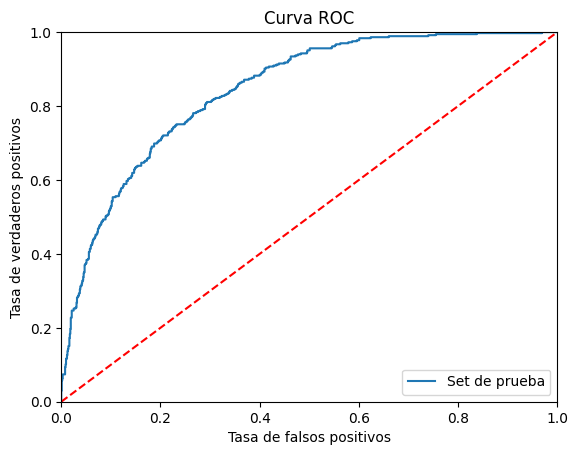

In [43]:
#Modelo de Regresión Logística
model_logistic = LogisticRegression(solver = 'newton-cholesky', random_state = 12345)
accu_logistic, roc_auc_logistic = model_metrics(model_logistic, features_train_upsampled, target_train_upsampled, features_test, target_test)


Para ser nuestro primero modelo de clasificación, ambas métricas propuestas tienen buenos resultados.

### 4.5 Modelo de Árbol de Decisión de Clasificación.

Para los posteriores modelos estaremos haciendo uso de la herramientas ``GridSearch`` para poder hallar los mejores hiperparámetros a evaluar en los modelos. Y posteriormente aplicar la función para obtener las métricas propuestas.

In [44]:
#Creación de malla (diccionario) para buscar los mejores hiperparámetros
param_grid_dtc = {'max_depth': [10, 20, 30]}

#Modelo de Árbol de Decisión
model_dtc = DecisionTreeClassifier(random_state = 12345)
grid_search_dtc = GridSearchCV(model_dtc, param_grid_dtc, scoring = 'roc_auc', verbose = True)
grid_search_dtc.fit(features_train_upsampled, target_train_upsampled)
best_params_dtc = grid_search_dtc.best_params_
best_score_dtc = grid_search_dtc.best_score_
print('Mejores hiperparámetros:', best_params_dtc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'max_depth': 30}


Exactitud del modelo: 0.76

AUC-ROC Score: 0.83


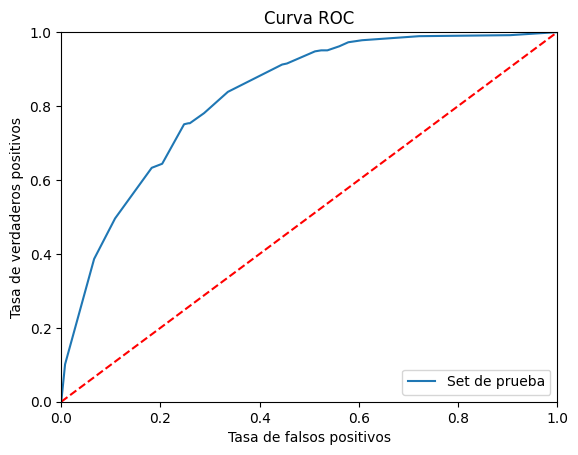

In [45]:
#Aplicar los mejores hiperparametros al modelo
model_dtc_new = DecisionTreeClassifier(max_depth = 5, random_state = 12345)
accu_dtc, roc_auc_dtc = model_metrics(model_dtc_new, features_train_upsampled, target_train_upsampled, features_test, target_test)

Si bien es cierto que obtuvimos buenas métricas para este segundo modelo, lo interesante de esto es que manipulamos la profindidad (``max_depth``), ya que inicialmente ``GridSearch`` nos dió un output de 20 para este hiperparámetro, sin embargo, las métricas no eran las mejores. Después de algunos intentos, lo que hicimos fue disminuir este valor a 5, teniendo así los valores de las métricas previamente obtenidas. 

### 4.6 Modelo de Bosque Aleatorio de Clasificación

Misma metodología para nuestro modelo de RandomForest.

In [46]:
#Vamos a crear la malla de hiperparámetros
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30], 'bootstrap': [True, False]}
#Modelo de Bosque Aleatorio
model_rf = RandomForestClassifier(random_state = 12345)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring = 'roc_auc', verbose = True)
grid_search_rf.fit(features_train_upsampled, target_train_upsampled)
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print('Mejores hiperparámetros:', best_params_rf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 150}


Exactitud del modelo: 0.8

AUC-ROC Score: 0.85


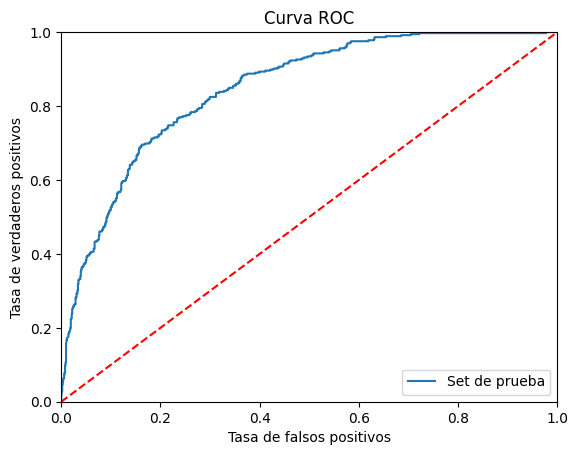

In [47]:
#Aplicación de hiperparámetros al modelo
model_rf_new = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 12345)
accu_rf, roc_auc_rf = model_metrics(model_rf_new, features_train_upsampled, target_train_upsampled, features_test, target_test)

El modelo de Bosque Aleatorio de Clasificación ha mostrado, de momento, tener las mejores métricas en relación a la exactitud y al score ROC - AUC. Veamos si la potenciación categórica puede ser mejor respecto a los previos modelos a probar. 

### 4.7 Potenciación Categórica (CatBoost)

Para este caso tenemos que delimitar nuestras varibles categóricas y posteriormente entrenar nuestro modelo para poder ver cómo responde respecto a las métricas.

In [48]:
#Creación de la malla de hiperparámetros para CatBoost
param_grid_cat = {'iterations': [50, 100, 150], 'depth': [5, 6, 8], 'learning_rate': [0.01, 0.1, 1]}
#Modelo de CatBoost
model_cat = CatBoostClassifier(random_state = 12345, verbose = False)
grid_search_cat = GridSearchCV(model_cat, param_grid_cat, scoring = 'roc_auc', verbose = True)
grid_search_cat.fit(features_train_upsampled, target_train_upsampled)
best_params_cat = grid_search_cat.best_params_
best_score_cat = grid_search_cat.best_score_
print('Mejores hiperparámetros:', best_params_cat)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros: {'depth': 8, 'iterations': 150, 'learning_rate': 1}


Exactitud del modelo: 0.79

AUC-ROC Score: 0.85


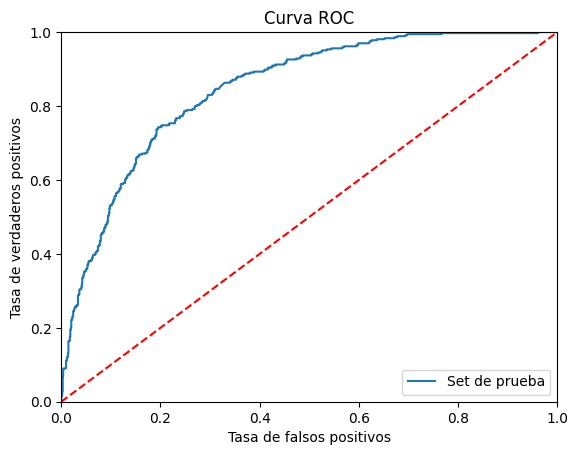

In [49]:
#Aplicación de los hiperparámetros a CatBoost
model_cat_new = CatBoostClassifier(iterations = 100, depth = 5, learning_rate = 0.01, random_state = 12345, verbose = False)
accu_cat, roc_auc_cat = model_metrics(model_cat_new, features_train_upsampled, target_train_upsampled, features_test, target_test)

Para este caso de ``CatBoost`` podemos apreciar que en el caso de la exactitud no hay una mejoría, de hecho, tiene un retroceso en el valor, sin embargo, no podemos decir lo mismo para el score ``ROC - AUC``, para este caso el valor entre el Random Forest de clasificación es similar.

## Conclusiones 

Una vez realizado todos los movimientos en cuanto a entrenamiento se refiere y de acuerdo a la evaluación de los modelos podemos decir que el mejor es el modelo ``RandomForestClassifier``.

Si bien es cierto que ambos tienen los mejores scores de ``ROC - AUC``, también he tomado en cuenta el tiempo computacional que requiere el entrenamiento entre el Bosque Aleatorio y CatBoost de CLasificación, y además, la exactitud (``accuracy``).

Random Forest tiene las principales métricas a tomar en cuenta, respectivamente tenemos los siguientes valores:

- *Exactitud (``accuracy``) : 0.80*

- *Score ROC - AUC : 0.85*

- *Tiempo computacional menor respecto a CatBoost.*


Si bien es cierto que RandomForest tiene las mejores métricas, pondría en segundo lugar a la Regresíon Logística, si tomamos en cuenta completamente el tiempo computacional, definitivamente es el mejor. 
Es importante tomar en cuenta que muchas veces en Modelos de Machine Learning _menos es más_, es decir, a veces los modelos de ML más complejos no necesariamente nos entregarán las mejores métricas en tareas tanto de Regresión o de Clasificación.

Otro punto a tomar en cuenta es que, curiosamente, nuestras métricas no cambian cuando realizo una estandarización normalizada (``MinMaxScaler``) a cuando utilizo ``StandardScaler``. Una de las principales justificaciones de utilizar la normalización es porque, generalmente, nuestras columnas/atributos numéricos no tienen una distribución normal, por lo anterior, se normaliza.

Sin embargo, también tomé en cuenta que mis variables numéricas tenían diferente magnitud numérica, razón de utilizar la estandarización.

## Resumen de modelos 

En el siguiente apartado vamos a resumir en un dataframe los valores de las métricas obtenidos (``accuracy``, ``ROC - AUC``) para cada uno de los modelos.

In [50]:
#Resumen
df_resume = pd.DataFrame({'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Bosque Aleatorio', 'CatBoost - Potenciación Categórica'],
                          'Exactitud - Conjunto de Prueba': [accu_logistic, accu_dtc, accu_rf, accu_cat],
                          'AUC-ROC - Conjunto de Prueba': [roc_auc_logistic, roc_auc_dtc, roc_auc_rf, roc_auc_cat]})

#Vamos a redondedear los valores
for col in df_resume.columns[1:]:
    df_resume[col] = round(df_resume[col], 2)

df_resume

,Modelo,Exactitud - Conjunto de Prueba,AUC-ROC - Conjunto de Prueba
0,Regresión Logística,0.77,0.84
1,Árbol de Decisión,0.76,0.83
2,Bosque Aleatorio,0.80,0.85
3,CatBoost - Potenciación Categórica,0.79,0.85


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has implementado correctamente los modelos de clasificación. La evaluación de estos modelos demuestra un enfoque equilibrado al considerar no solo las métricas de rendimiento, como la exactitud y el ROC-AUC, sino también el tiempo computacional, lo cual es crucial en aplicaciones prácticas. Has identificado correctamente que RandomForestClassifier ofrece el mejor equilibrio entre precisión y eficiencia, destacando su superioridad sobre CatBoost en términos de tiempo de entrenamiento. Además, tu observación sobre la Regresión Logística como una alternativa viable debido a su bajo costo computacional refleja una comprensión profunda de la importancia de la simplicidad en los modelos de Machine Learning. Es interesante cómo señalas que la normalización no impactó significativamente en las métricas, lo que sugiere que la magnitud de las variables no fue un factor determinante en este caso, aunque valdría la pena comparar con los datos en bruto para ver si realmente hay un efecto en nuestro conjunto de datos. Para futuros trabajos, podrías explorar si otras técnicas de preprocesamiento, como la reducción de dimensionalidad o la selección de características, podrían mejorar aún más el rendimiento del modelo.

</div>

# **Informe de Solución**

A través del presente informe vamos a contestar una serie de preguntas que van fundamentadas con el código de solución previamente entregado y revisado.

Estas preguntas, considero yo, forman parte intrínseca de cómo podemos mejorar algunas habilidades de comunicación de resultados, y además, de cómo podemos mejorar en cuanto algunos insights importantes a tomar en cuenta.

Responderé las preguntas tal cual se han propuesto para responder.

## ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

Realmente todos los pasos fueron cubiertos durante este proyecto, desde el punto de vista de experimentación. Es decir, desde el preprocesamiento de datos, ver puntos claves, cómo manejar o cómo lidiar con algunas columnas que pudieron suponer algún tipo de _ruido_ durante el análisis o cómo estás podrían influir en el desarrollo o ejecución del entrenamiento del modelo propuesto.


Durante el EDA se realizarón los pasos correspondientes al enriquecimiento de los datos en función de los dataframes que teniamos presentados. Vimos la distribución de las variables categóricas y numéricas, además de algunos supuestos que podrían presentarse o que podrían afectar en el entrenamiento del modelo. Para lo anterior mencionado, tal y como comentamos en su momento, lidiamos con esto mediante _normalización_ o _estandarización_. Después de todo, análizamos el comportamiento de ambos métodos durante el entrenamiento y la ejecución de las métricas. 

Posteriormente, finalizado el EDA, pasamos a la parte o sección que implica el hecho de poder particionar y definir nuestro dataset. Esto involucra totalmente el hecho de definir nuestras _features_ y _target_ además de particionar nuestro dataframe en _train_ y _test_. Esta sección es importante ya que aquí aplicamos la mayoría de métodos que son de relevancia en nuestras características categóricas y numéricas, es importante ya que aplicamos la normalización, estandarización y codificación (One - Hot Encoding). 

El resto de movimientos se fácilita por la razón de haber creado una función en donde delimitamos los sets de entrenamiento y prueba para nuestras _features_ y _target_.

Hablando en términos de qué fue posiblemente aquello que se omitió podría mencionar lo la reducción dimensional de características, es decir, ¿qué variables realmente eran las importantes durante el entrenamiento del modelo? Este es un paso que me faltó probar, no lo ejecuté principalmente porque las variables o características que estaban involucradas mostraban cierta correlación con mi target, además de que si eliminaba estas variables que no tenian cierta correlación, ¿cuántas características tendría?

## ¿Qué dificultades encontraste y cómo lograste resolverlas?

Todo parece trivial cuando estamos realizando en preprocesamiento de datos y el EDA, pero tuve algunos pequeños contratiempos al momento del entrenamiento.

Afortunadamente pude darme cuenta que se trataba de un desbalance de clases, pero me preguntaba constantemente sobre la relevancia de las fechas de inicio en el dataset original. 

Por un momento olvidé que había un método en el que podiamos asignar las fechas como índice y tratarlo como una serie temporal, claro, tomando unicamente en cuenta o como ejemplo en qué momento los clientes tenían más inscripciones a estos servicios. 

Otro pequeña dificultad que pude presentar fue cómo presentar mi columna _target_ de forma alterna. 
Claro, teniamos nuestras columna/variable de interés, sin embargo, tenía que pasar por un procesamiento o de transformación para que fuese más sencillo de poder manipular esta varible objetivo. Finalmente pude realizar esa conversión binaria de quiénes cancelaban y quiénes no. 


Otro partícular detalle que tuve investigar fue lo de evitar el famoso _data leakeage_ o también conocido como fuga de datos. Por lo que para evitar este tipo de fenomenos o errores durante el entrenamiento lo mejor es definir primero nuestros _features_ y _target_ además de aplicar el método *train_test_split* para que posteriormente pudieramos aplicar la codificación, estandarización y sobremuestreo, y así, no tener un sobreentrenamiento o tener fuga en la partición del dataset.

Finalmente, hallar los mejores hiperparámetros de los modelos. Si bien es cierto que ocupamos _GridSearchCV_ finalmente no ocupamos los hiperparámetros propuestos por GridSearchCV. Realmente hicimos un ejercicio de iteración sobre los mejores valores propuestos, y así, tener los mejores valores de _accuracy_ y _ROC - AUC Score_.

## ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

Definitivamente el sobremuestreo y darnos cuenta que había un desbalance de clases. 

Yo, personalmente considero que es uno de los principales pasos clave a resolver, ya que no nos dabamos cuenta de que se trataba de un desbalance de clase y realizabamos todo de manera original tendriamos un sobreajuste o sobreentrenamiento, lo cual como resultado iba a influir de manera negativa en nuestras métricas de interés.

¿De qué manera?

Principalmente porque nuestros valores de métricas hubieran salido "muy buenos", lo cual hubiera sido muy raro a la primera iteración o ejecución de modelos, entonces esa es la clave principal. 

Quizás los pasos previos al entrenamiento como la normalización, codificación sean también pasos clave, y claro, la claridad de pasos o la selección de métricas a elegir en el caso de GridSearchCV.

## ¿Cuál es tu modelo final y qué nivel de calidad tiene?

Es cierto que hemos entrenado 3 modelos de clasificación y también hemos aplicado el potenciador de clasificación (CatBoost). Sin embargo, es cierto que _RandomForest_ tiene las mejores métricas, pondría en segundo lugar a la _Regresíon Logística_, si tomamos en cuenta completamente el tiempo computacional, definitivamente es el mejor. 

Métricas _Regresión Logística_:

- Exactitud (_accuracy_) ---> $0.77$
- Score ROC - AUC ---> $0.84$

Métricas _Random Forest Classifier_:

- Exactitud (_accuracy_) ---> $0.80$
- Score ROC - AUC ---> $0.85$

Tal y como había mencionado previamente, debemos tomar en cuenta que muchas veces en Modelos de Machine Learning _menos es más_, es decir, a veces los modelos de ML más complejos no necesariamente nos entregarán las mejores métricas en tareas tanto de Regresión o de Clasificación.

Sin embargo, si nos enfocamos en un nivel de cálidad en el contexto de métricas, definitivamente nuestro mejor módelo será _Random Forest Classifier_.